## Lab | Logisitc Regression, Handling Imbalanced Data

For this lab we will build a model on customer churn binary classification problem. You will be using `Data/DATA_Customer-Churn.csv` file.

### Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe `churnData`.
- Check the datatypes of all the columns in the data. You would see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
  - Scale the features either by using normalizer or a standard scaler.
  - Split the data into a training set and a test set.
  - Fit a logistic Regression model on the training data.
 
 Round 2
  - Fit a Decision Tree Classifier on the training data.
  - Check the accuracy on the test data.

 Round 3
 -  apply K-fold cross validation on your Decision Tree Classifier and check the model score.
 -  fit a Random forest Classifier on the data and compare the accuracy.
**Note**: So far we have not balanced the data.

Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999
import warnings
warnings.filterwarnings('ignore')

In [2]:
churnData=pd.read_csv("Data/DATA_Customer-Churn.csv" )

#### Data preparation

In [3]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
churnData['TotalCharges'] =  pd.to_numeric(churnData['TotalCharges'], errors='coerce') 

In [5]:
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
#fill NaN in TotalCharges with mean

#print('Number of NaNs:', churnData['TotalCharges'].isna().sum())
mean_totalcharges = np.mean(churnData['TotalCharges'])
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(mean_totalcharges) 

In [7]:
print('Number of NaNs:', churnData['TotalCharges'].isna().sum())

Number of NaNs: 0


#### Xy Split

In [8]:
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = churnData['Churn'] #Target feature

#### Scaling

In [9]:
std_scaler=StandardScaler().fit(X) 
X_scaled=std_scaler.transform(X)

#### Train Test Split

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=.20, random_state=42)

### Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.787540,0.807665
1,Precision,0.645570,0.699219
2,Recall,0.443182,0.479893


Confusion matrix for the train set


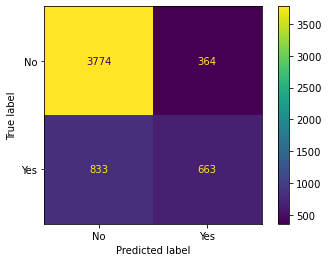



Confusion matrix for the test set


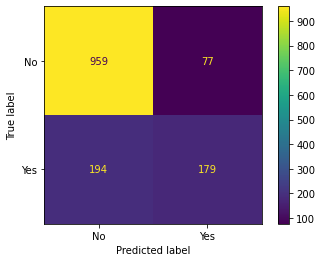

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

log = LogisticRegression() 

log.fit(X_train, y_train)



y_pred_train_log = log.predict(X_train)
y_pred_test_log = log.predict(X_test)


performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log, pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_log, pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log, pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_log, pos_label='Yes')]})



display(performance_log)

print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_log))
#plot_confusion_matrix(log,X_train, y_train, values_format = 'd', cmap='inferno') #old version plot_confusion_matrix
#plt.show()

cm = confusion_matrix(y_train, y_pred_train_log,labels=log.classes_) #new version: confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log.classes_)
disp.plot()
plt.show()


print()
print()

print("Confusion matrix for the test set")
#print(confusion_matrix(y_test, y_pred_test_log))
#plot_confusion_matrix(log,X_test,y_test, values_format = 'd', cmap='inferno')
#plt.show()

cm = confusion_matrix(y_test, y_pred_test_log, labels=log.classes_) #new version: confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log.classes_)
disp.plot()
plt.show()



### Decision Tree Classifier

,Error_metric,Train,Test
0,Accuracy,0.782570,0.792051
1,Precision,0.648738,0.663934
2,Recall,0.395053,0.434316


Confusion matrix for the train set


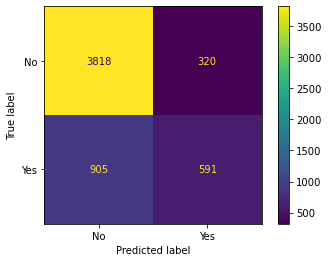



Confusion matrix for the test set


In [121]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = DecTree.predict(X_train)
y_pred_test_dt = DecTree.predict(X_test)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_dt, pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_dt, pos_label='Yes')]})



display(performance_log)

print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt))
cm = confusion_matrix(y_train, y_pred_train_dt,labels=log.classes_) #new version: confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log.classes_)
disp.plot()
plt.show()

print()
print()

print("Confusion matrix for the test set")
#print(confusion_matrix(y_test, y_pred_test_dt))
cm = confusion_matrix(y_test, y_pred_test_dt,labels=log.classes_) #new version: confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log.classes_)

In [78]:
!pip install graphviz

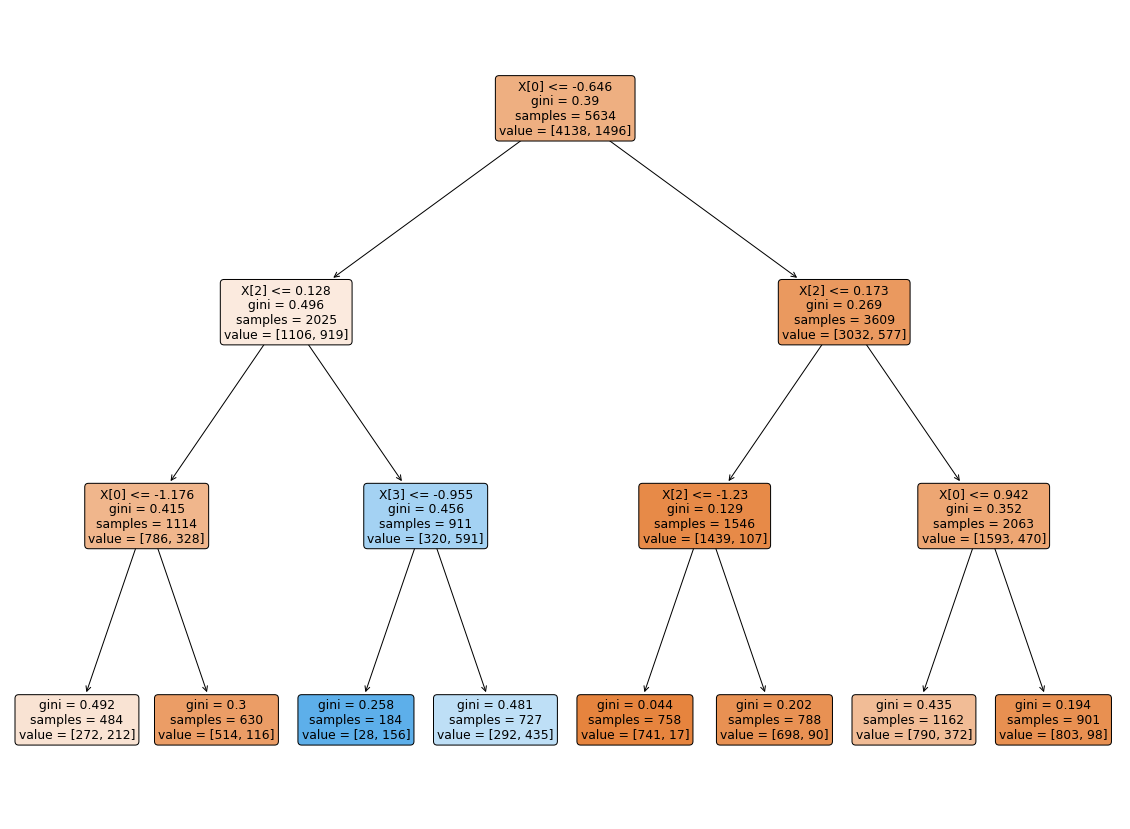

In [98]:
from sklearn.tree import plot_tree

fig, axes = plt.subplots(figsize = (20,15))

plot_tree(dt,filled = True, rounded=True)
plt.show() 